In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

In [2]:
DATADIR = "C:/Users/DELL/Documents/Data Analysis/Projects/Image Classification/PetImages"
CATEGORIES = ["Cat","Dog"]

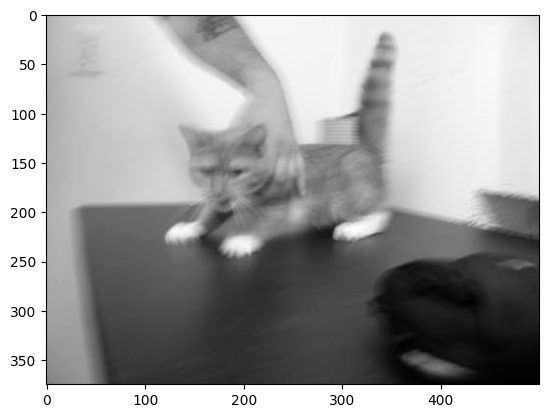

In [5]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [6]:
print(img_array.shape)

(375, 500)


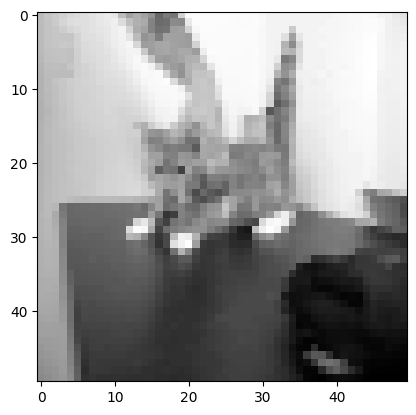

In [7]:
IMG_SIZE = 50

new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [8]:
training_data =[]
def creating_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
creating_training_data()

In [9]:
print(len(training_data))

24943


In [10]:
import random

random.shuffle(training_data)

In [11]:
for samples in training_data[:10]:
    print(samples[1])

1
0
1
1
1
0
1
1
1
1


In [12]:
X = []
y = []


In [13]:
for feature,label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X = X/255.0
y = np.array(y)

In [14]:
model = Sequential([
    Conv2D(64, (3,3), activation ='relu', input_shape=X.shape[1:]),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,313 (2.03 MB)

 Trainable params: 533,313 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1,verbose=1)

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.6217 - loss: 0.6349 - val_accuracy: 0.7367 - val_loss: 0.5203
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7602 - loss: 0.5010 - val_accuracy: 0.7719 - val_loss: 0.4931
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7878 - loss: 0.4532 - val_accuracy: 0.7788 - val_loss: 0.4762
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8037 - loss: 0.4228 - val_accuracy: 0.7936 - val_loss: 0.4582
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8252 - loss: 0.3850 - val_accuracy: 0.7784 - val_loss: 0.4726
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8354 - loss: 0.3615 - val_accuracy: 0.7968 - val_loss: 0.4573
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.8596 - loss: 0.3178 - val_accuracy: 0.8008 - val_loss: 0.4468
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8754 - loss: 0.2804 - 

In [18]:
test_DATADIR = "C:/Users/DELL/Documents/Data Analysis/Projects/Image Classification/TestImage"
test_CATEGORIES = ['Cats','Dogs']

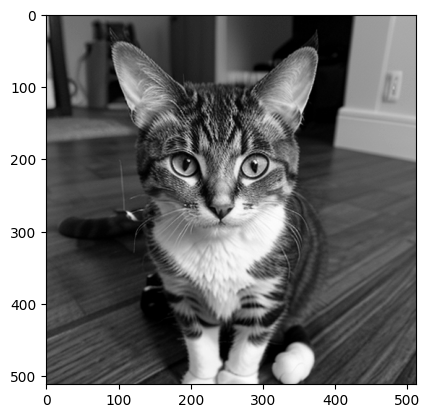

In [20]:
for category in test_CATEGORIES:
    path = os.path.join(test_DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break


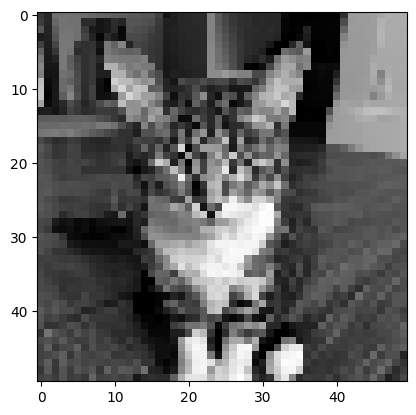

In [21]:
IMG_SIZE = 50

new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [22]:

test_data =[]
def creating_test_data():
    for category in test_CATEGORIES:
        path = os.path.join(test_DATADIR,category)
        class_num = test_CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
creating_test_data()

In [23]:
print(len(test_data))

42


In [24]:
random.shuffle(test_data)

In [25]:
for samples in test_data[:10]:
    print(samples[1])

1
0
1
0
0
1
0
1
0
1


In [43]:
X_test = []
y_test = []

In [44]:
for feature,label in test_data:
    X_test.append(feature)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test = X_test/255.0
y_test = np.array(y_test)

In [45]:
prediction = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [46]:
print(prediction)

[[9.5385224e-01]
 [1.0842265e-04]
 [9.9999934e-01]
 [9.3339486e-07]
 [8.2331014e-01]
 [9.7862619e-01]
 [4.3387138e-03]
 [9.9999893e-01]
 [6.0562390e-01]
 [9.9999958e-01]
 [1.1467992e-02]
 [5.9245049e-06]
 [1.0336906e-01]
 [7.6743001e-01]
 [4.4543505e-02]
 [3.9686100e-05]
 [4.9341839e-02]
 [5.9029054e-02]
 [3.9250799e-07]
 [3.1116180e-04]
 [9.4522071e-01]
 [4.8378866e-02]
 [7.2057974e-01]
 [2.5796012e-03]
 [1.7703447e-01]
 [2.9589899e-04]
 [6.2955625e-02]
 [9.8217446e-01]
 [9.9062282e-01]
 [1.9878070e-01]
 [4.1615123e-01]
 [2.2752257e-02]
 [9.1498816e-01]
 [8.9409688e-05]
 [4.3686381e-01]
 [9.8784769e-01]
 [5.9919070e-02]
 [3.3475677e-05]
 [9.5688879e-01]
 [5.0389776e-03]
 [7.0114267e-01]
 [3.1217069e-03]]


In [47]:
for pred in prediction:
    if pred > 0.5:
        print("Dog")
    else:
        print("Cat")    

Dog
Cat
Dog
Cat
Dog
Dog
Cat
Dog
Dog
Dog
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Dog
Dog
Cat
Cat
Cat
Dog
Cat
Cat
Dog
Cat
Cat
Dog
Cat
Dog
Cat


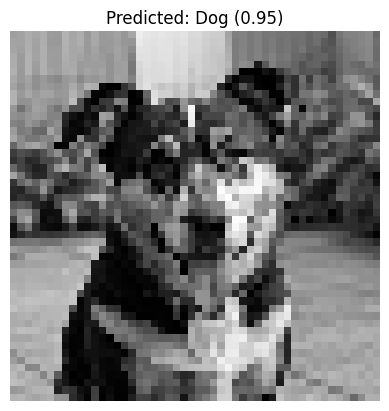

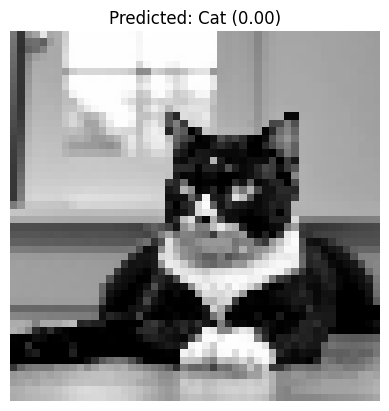

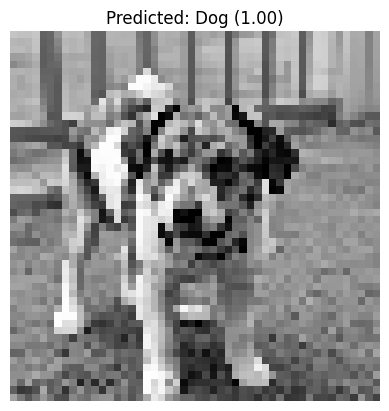

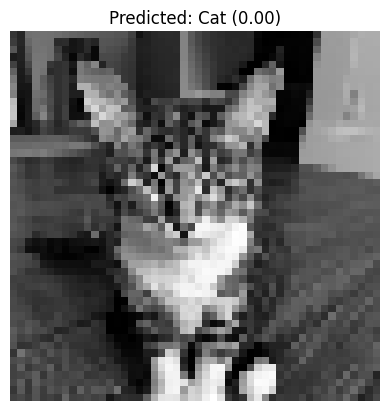

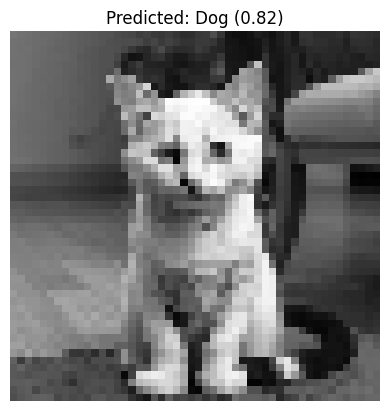

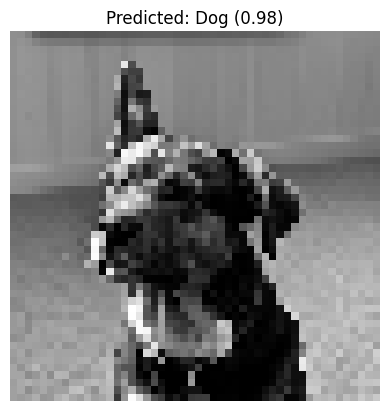

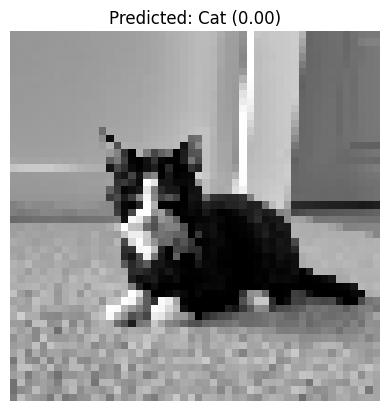

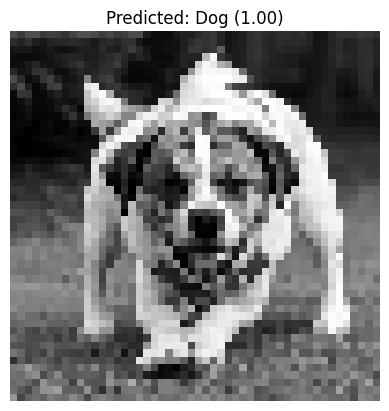

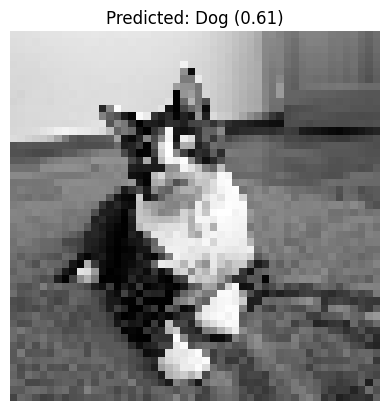

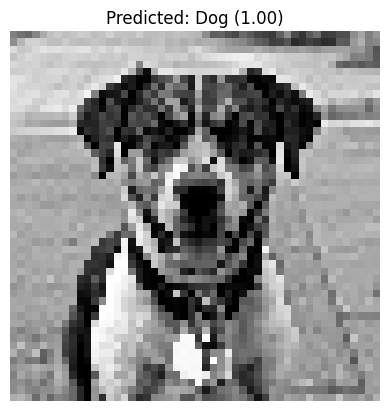

In [48]:
for i in range(10):  # Change range as needed
    img = X_test[i].reshape(IMG_SIZE, IMG_SIZE)  # Remove channel dimension for grayscale
    pred = prediction[i]
    
    label = "Dog" if pred >= 0.5 else "Cat"

    # Plot the image with label
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {label} ({pred[0]:.2f})")
    plt.axis('off')
    plt.show()
